# world values survey

EVS/WVS (2020). European Values Study and World Values Survey: Joint EVS/WVS 2017-2021 Dataset (Joint EVS/WVS). JD Systems Institute & WVSA. Dataset Version 1.0.0, doi:10.14281/18241.2



In [2]:
%pylab inline
import pandas as pd
from sklearn.metrics import matthews_corrcoef as phi
import itertools
#from pyppca import ppca
from sklearn.decomposition import PCA

plt.rcParams.update({
    "figure.dpi": 100,
    "figure.figsize": (4, 3),
    "figure.facecolor": "white", #"lightyellow",
    
    "savefig.dpi": 150,
    
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
    "font.size": 8,
    
    "lines.linewidth": 2,
    "lines.marker": "",
    "lines.markersize": 8,
    
    "axes.spines.left": False,
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.edgecolor": "grey",
    "axes.labelsize": 8,
    "axes.labelcolor": "grey",
    "axes.facecolor": "#00000000",
    
    "xtick.color": "grey",
    "xtick.labelsize": 8,
    "xtick.major.size": 2,
    
    "ytick.major.size": 0,
    "ytick.color": "grey",
    "ytick.labelsize": 8,
    
    "text.color": "grey",
    "text.usetex": True
})

Populating the interactive namespace from numpy and matplotlib


In [3]:
wvs = pd.read_spss('~/Desktop/keyword_data/World values survey/WVS_Cross-National_Wave_7_sav_v1_5.sav', convert_categoricals=False)
use_cols = ["Q%i"%i for i in np.concatenate([
    list(range(1,7)), # important in your life
    list(range(7,18)), # qualities of children
    list(range(18,27)), # bad neighbors
    list(range(27,42)), # employment and education
    list(range(43,45)), # changes
    list(range(58,64)), # trust people
    list(range(64,90)), # trust orgs
    list(range(106,111)), # economic values
    list(range(121,131)), # immigrant
    list(range(158,164)), # science+tech
    list(range(164,175)), # economic
    list(range(176,199)), # ethics and norms
    list(range(235,240)), # political
    list(range(241,250)) # economic
])]
print('% missing ', wvs[use_cols].isna().mean().mean())
wvs[use_cols]

% missing  0.042880403510174754


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q239,Q241,Q242,Q243,Q244,Q245,Q246,Q247,Q248,Q249
0,1.0,1.0,1.0,3.0,1.0,4.0,1.0,1.0,2.0,1.0,...,3.0,7.0,2.0,8.0,8.0,1.0,7.0,7.0,7.0,6.0
1,1.0,1.0,1.0,4.0,1.0,4.0,1.0,2.0,1.0,1.0,...,4.0,9.0,7.0,10.0,6.0,1.0,10.0,4.0,5.0,10.0
2,1.0,2.0,2.0,2.0,3.0,3.0,2.0,1.0,2.0,1.0,...,4.0,7.0,7.0,10.0,7.0,4.0,8.0,4.0,7.0,10.0
3,1.0,1.0,1.0,4.0,2.0,4.0,1.0,2.0,2.0,1.0,...,4.0,9.0,8.0,8.0,10.0,2.0,9.0,7.0,7.0,9.0
4,1.0,1.0,1.0,3.0,1.0,3.0,1.0,2.0,1.0,1.0,...,3.0,8.0,2.0,8.0,7.0,2.0,8.0,6.0,8.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70862,1.0,3.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,2.0,...,3.0,4.0,3.0,4.0,3.0,2.0,3.0,2.0,2.0,2.0
70863,1.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,...,4.0,1.0,1.0,1.0,1.0,1.0,7.0,1.0,7.0,1.0
70864,1.0,3.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,...,3.0,10.0,1.0,10.0,10.0,1.0,10.0,10.0,10.0,10.0
70865,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,4.0,10.0,1.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0


In [17]:
for k,v in wvs.groupby('B_COUNTRY_ALPHA')['D_INTERVIEW'].count().items():
    print("%s (%s)"%(k,v), end=', ')

AND (1004), ARG (1003), AUS (1813), BGD (1200), BOL (2067), BRA (1762), CHL (1000), CHN (3036), COL (1520), CYP (1000), DEU (1528), ECU (1200), EGY (1200), ETH (1230), GRC (1200), GTM (1203), HKG (2075), IDN (3200), IRN (1499), IRQ (1200), JOR (1203), JPN (1353), KAZ (1276), KGZ (1200), KOR (1245), LBN (1200), MAC (1023), MEX (1739), MMR (1200), MYS (1313), NGA (1237), NIC (1200), NZL (1057), PAK (1995), PER (1400), PHL (1200), PRI (1127), ROU (1257), RUS (1810), SRB (1046), THA (1500), TJK (1200), TUN (1208), TUR (2415), TWN (1223), UKR (1289), USA (2596), VNM (1200), ZWE (1215), 

In [48]:
def measure_group(
    df,
    n_comparisons=10000,  # how many pairwise comparisons to include in the plot
):
    
    df = df.dropna(axis=1, how='all')
    
    coeffs = []
    for _ in range(n_comparisons):
        a, b = np.random.choice(df.index, size=2, replace=False)
        coeffs.append(df.loc[[a,b]].T.corr().loc[a,b])

        
    shuffle_df = pd.DataFrame(index=df.index, columns=df.columns)
    for col in df.columns:
        shuffle_df[col] = np.random.permutation(df[col].values)
        
    shuffle_coeffs = []
    for _ in range(n_comparisons):
        a, b = np.random.choice(shuffle_df.index, size=2, replace=False)
        shuffle_coeffs.append(shuffle_df.loc[[a,b]].T.corr().loc[a,b])
        
    df.fillna(df.mean(), inplace=True)
    shuffle_df.fillna(shuffle_df.mean(), inplace=True)
    
    pca = PCA(n_components=10)
    pca.fit(df)
    components = pca.explained_variance_ratio_

    pca.fit(shuffle_df)    
    shuffle_components = pca.explained_variance_ratio_
        
    percentiles = range(1,101)
    similarity = pd.Series(
        index=percentiles, 
        data=np.percentile(coeffs, q=percentiles)
    )
    shuffle_similarity = pd.Series(
        index=percentiles, 
        data=np.percentile(shuffle_coeffs, q=percentiles)
    )
    
    return similarity, shuffle_similarity, components, shuffle_components

In [49]:
print("using %i variables" % len(use_cols))

similarity_df = pd.DataFrame()
shuffle_similarity_df = pd.DataFrame()
pca_df = pd.DataFrame()
shuffle_pca_df = pd.DataFrame()
total_n = 0
for country, group in wvs.groupby('B_COUNTRY_ALPHA'):
    print(country, end=' ')
    total_n += len(group)
    similarity_df[country], shuffle_similarity_df[country], pca_df[country], shuffle_pca_df[country] = measure_group(group[use_cols])
    
pd.to_pickle([similarity_df, shuffle_similarity_df, pca_df, shuffle_pca_df, total_n],
             "WVS_similarities.pickle")  

using 144 variables
AND 

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4439: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


ARG AUS 

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4439: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


BGD BOL BRA CHL CHN 

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4439: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


COL CYP DEU ECU EGY 

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4439: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


ETH GRC GTM HKG IDN IRN 

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4439: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


IRQ 

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4439: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


JOR 

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4439: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


JPN KAZ KGZ 

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4439: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


KOR LBN 

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4439: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


MAC 

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4439: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


MEX MMR MYS NGA NIC 

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4439: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


NZL 

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4439: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


PAK PER 

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4439: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


PHL PRI ROU RUS SRB THA TJK 

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4439: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


TUN 

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4439: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


TUR 

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4439: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


TWN 

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:4439: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


UKR USA VNM ZWE 

No handles with labels found to put in legend.
No handles with labels found to put in legend.


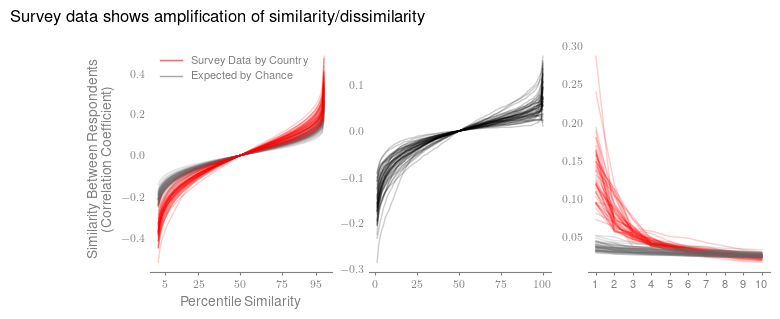

In [57]:
plt.figure(figsize=(8,3))
similarity_df2 = similarity_df - similarity_df.loc[50]
shuffle_similarity_df2 = shuffle_similarity_df - shuffle_similarity_df.loc[50]

ax1 = plt.subplot(1,3,1)
plt.plot(shuffle_similarity_df2, 'dimgrey', alpha=.2, linewidth=1)
plt.plot(similarity_df2, 'r', alpha=.2, linewidth=1)

# legend dummies
plt.plot([],[], 'r', label="Survey Data by Country", alpha=.6, linewidth=1)
plt.plot([],[], 'dimgrey', label="Expected by Chance", alpha=.6, linewidth=1)


plt.xlabel("Percentile Similarity", fontsize=10)
plt.ylabel("Similarity Between Respondents\n(Correlation Coefficient)", fontsize=10)
plt.xticks([5, 25, 50, 75, 95])
plt.legend(frameon=False)
plt.suptitle('Survey data shows amplification of similarity/dissimilarity', 
             x=-.05, y=1, ha='left', va='top', fontsize=12, color='k');


ax2 = plt.subplot(1,3,2)

effect = (similarity_df2 - shuffle_similarity_df2)
plt.plot(effect, 'k', alpha=.2, linewidth=1);
plt.legend(frameon=False)


ax3 = plt.subplot(1,3,3)
plt.plot(pca_df, 'r', alpha=.2, linewidth=1);
plt.plot(shuffle_pca_df, 'dimgrey', alpha=.2, linewidth=1);
plt.legend(frameon=False)
ax3.set_xticks(range(0,10))
ax3.set_xticklabels(range(1,11));
